## 4 K-Means Clustering

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [97]:
data = as_tibble(data.frame(x = c(1,3,5,1,5), y=c(3,3,3,2,2)))
centers = as_tibble(data.frame(name=c('c1', 'c2'), x=c(1,5), y=c(0, 4)))
nearest_cluster <- Vectorize(function(xd,yd) {
    (centers %>% mutate(dist=((x-xd)^2 + (y-yd)^2))%>% slice(which.min(dist)))$name
})
data['cluster']=apply(data[,c('x', 'y')], 1, function(x) nearest_cluster(x[1], x[2]))
head(data)

x,y,cluster
<dbl>,<dbl>,<chr>
1,3,c1
3,3,c2
5,3,c2
1,2,c1
5,2,c2


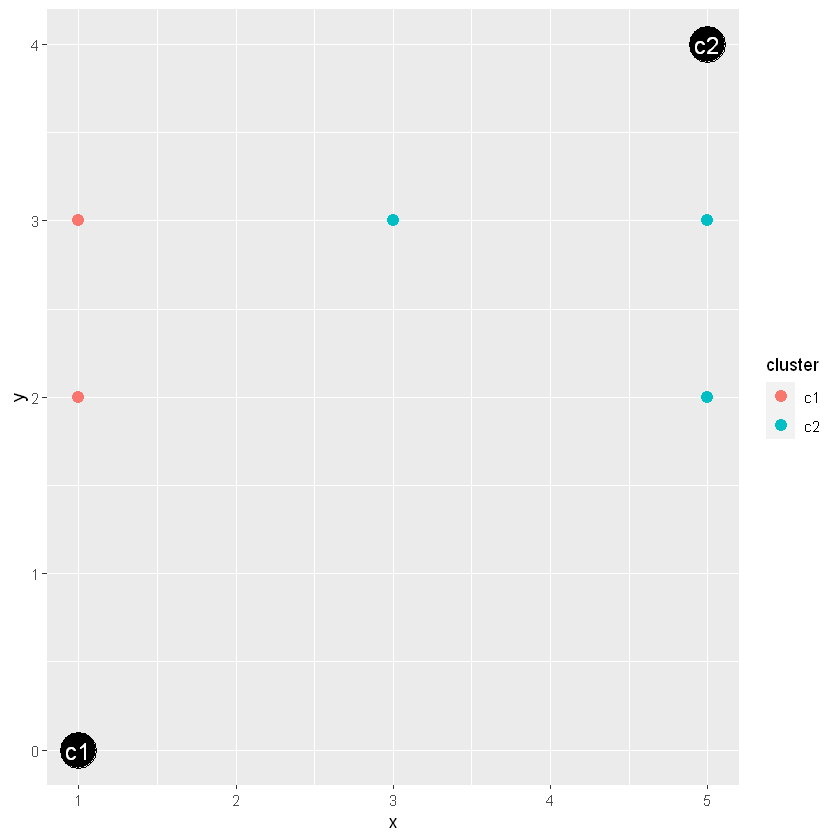

In [98]:
ggplot() +
    geom_point(data = data, mapping = aes(x=x, y=y, colour=cluster), size=3) +
    geom_point(data = centers, mapping = aes(x=x, y=y), colour="black", size=10) + 
    geom_text(data = centers, mapping = aes(x = x, y=y, label=name), color="white", size=5)

In [99]:
for (x in 1:50) {
    centers$x = apply(centers["name"], 1, function(name) mean(filter(data, cluster==name[1])$x))
    centers$y = apply(centers["name"], 1, function(name) mean(filter(data, cluster==name[1])$y))
    data['cluster']=apply(data[,c('x', 'y')], 1, function(x) nearest_cluster(x[1], x[2]))
}

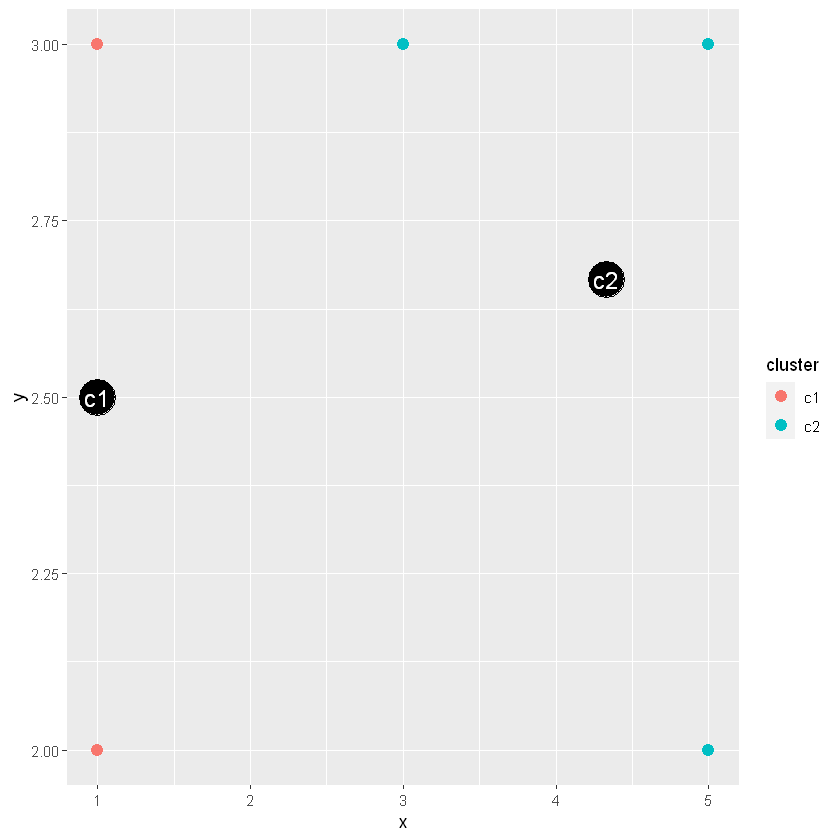

In [100]:
ggplot() +
    geom_point(data = data, mapping = aes(x=x, y=y, colour=cluster), size=3) +
    geom_point(data = centers, mapping = aes(x=x, y=y), colour="black", size=10) + 
    geom_text(data = centers, mapping = aes(x = x, y=y, label=name), color="white", size=5)

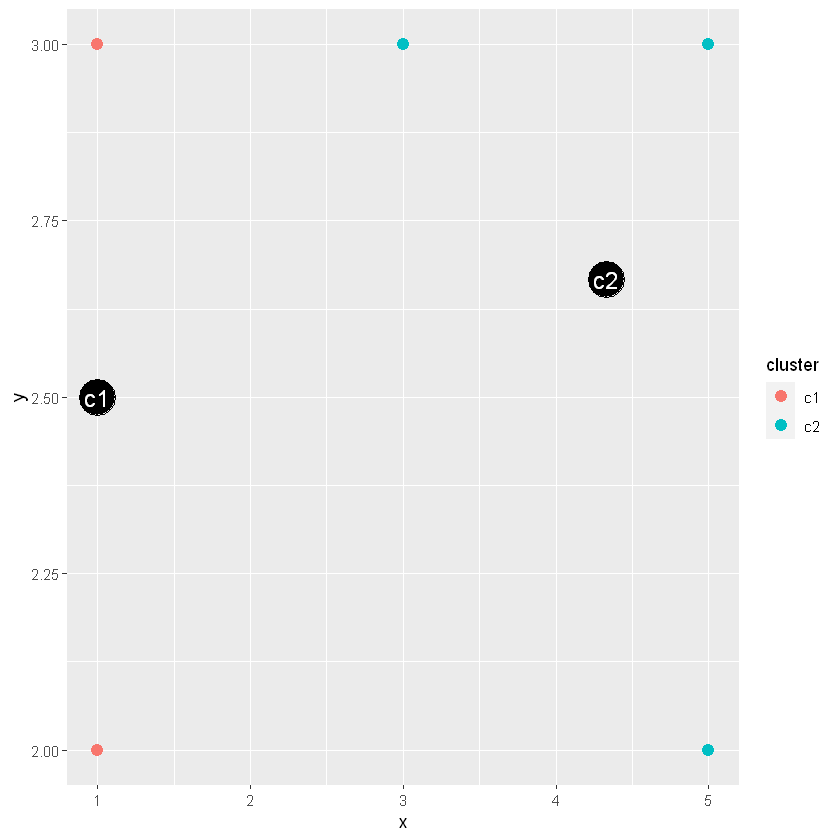

In [101]:
for (x in 1:100) {
    centers$x = apply(centers["name"], 1, function(name) mean(filter(data, cluster==name[1])$x))
    centers$y = apply(centers["name"], 1, function(name) mean(filter(data, cluster==name[1])$y))
    data['cluster']=apply(data[,c('x', 'y')], 1, function(x) nearest_cluster(x[1], x[2]))
}
                          
ggplot() +
    geom_point(data = data, mapping = aes(x=x, y=y, colour=cluster), size=3) +
    geom_point(data = centers, mapping = aes(x=x, y=y), colour="black", size=10) + 
    geom_text(data = centers, mapping = aes(x = x, y=y, label=name), color="white", size=5)

looks like we are stable